In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Read in the california housing data set
california_data = pd.read_csv('../Resources/California_Housing.csv')
california_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,5.2742,17.0,8.908654,1.884615,351.0,1.687500,32.98,-117.27
1,1.8438,52.0,3.069847,1.044293,2382.0,4.057922,34.07,-118.26
2,7.0691,13.0,6.689697,1.009697,2444.0,2.962424,37.57,-121.87
3,5.4719,38.0,5.890080,0.957105,1228.0,3.292225,37.52,-122.28
4,4.0156,35.0,6.195312,1.171875,669.0,5.226562,33.93,-117.41


In [3]:
# Get the information on the DataFrame
california_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      3000 non-null   float64
 1   HouseAge    3000 non-null   float64
 2   AveRooms    3000 non-null   float64
 3   AveBedrms   3000 non-null   float64
 4   Population  3000 non-null   float64
 5   AveOccup    3000 non-null   float64
 6   Latitude    3000 non-null   float64
 7   Longitude   3000 non-null   float64
dtypes: float64(8)
memory usage: 187.6 KB


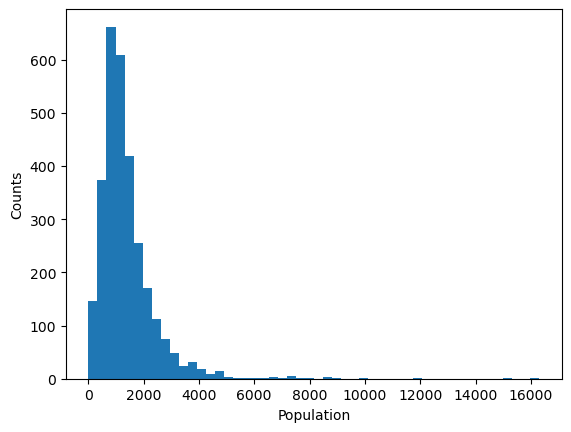

1387.9633333333334
1152.5
0    1128.0
Name: Population, dtype: float64


In [4]:
# Determine which measure of central tendency is most appropriate to describe the Population
plt.hist(california_data['Population'],bins=50)
plt.xlabel("Population")
plt.ylabel("Counts")
plt.show()
print(california_data['Population'].mean())
print(california_data['Population'].median())
print(california_data['Population'].mode())

NormaltestResult(statistic=4.051793503029496, pvalue=0.1318755305654543)
NormaltestResult(statistic=180.3750253562777, pvalue=6.792988937023087e-40)


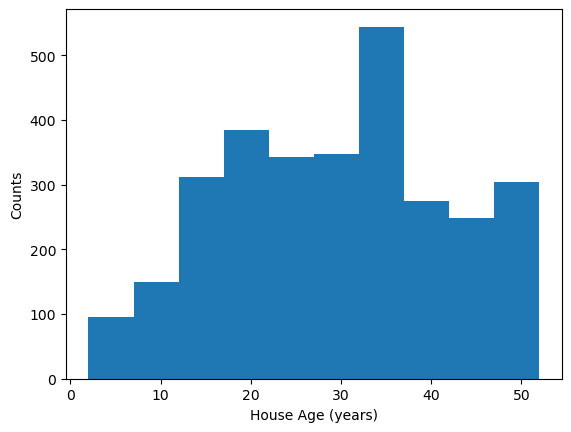

In [10]:
# Determine if the house age in California is normally distributed using a small and large sample size. 
house_age = california_data['HouseAge']
plt.hist(house_age)
plt.xlabel('House Age (years)')
plt.ylabel('Counts')
print(st.normaltest(house_age.sample(100)))
print(st.normaltest(house_age.sample(2000)))


In [9]:
# Determine if there are any potential outliers in the average occupancy in California
quartiles = california_data['AveOccup'].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
median = quartiles[.5]
iqr = upperq - lowerq

lower_bound = lowerq * (1.5 * iqr)
upper_bound = upperq * (1.5 * iqr)

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The median of occupancy is: {median}")
print(f"Values below {lower_bound} could be outliers")
print(f"Values above {upper_bound} could be outliers")

outlier_occupancy = california_data.loc[(california_data['AveOccup'] < lower_bound) | (california_data['AveOccup'] > upper_bound)]
outlier_occupancy

The lower quartile of occupancy is: 2.4250909806040477
The upper quartile of occupancy is: 3.297459274342836
The interquartile range of occupancy is: 0.8723682937387882
The median of occupancy is: 2.81970199317512
Values below 3.173358721366317 could be outliers
Values above 4.314898381247404 could be outliers


0.4999

In [7]:
# With the potential outliers, what is the lowest and highest median income (in $1000s) observed?
print(f"The minimum median income of potential outliers is {outlier_occupancy['MedInc'].min()}")
print(f"The maximum median income of potential outliers is {outlier_occupancy['MedInc'].max()}")

The minimum median income of potential outliers is 0.4999



In [8]:
# Bonus - plot the latitude and longitude of the California housing data using Matplotlib, color the data points using the median income of the block.

